# OASIS INFO BYTE (Internship) - DATA SCIENCE - TASK 3 --------> by NIDHIARASU 

In [6]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

#Loading the Dataset
data = pd.read_csv(r"C:\Users\rajin\OneDrive\Desktop\Internships\Oasis - Data Science\Task 3 - Car Price Prediction\car data.csv")
print(data.head())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [ ]:
#Assigning new column for Car_Age and dropping Year
data['Car_Age'] = 2025 - data['Year']
data.drop(['Year','Car_Name'],axis =1, inplace = True)
print(data.head())


   Selling_Price  Present_Price  Driven_kms Fuel_Type Selling_type  \
0           3.35           5.59       27000    Petrol       Dealer   
1           4.75           9.54       43000    Diesel       Dealer   
2           7.25           9.85        6900    Petrol       Dealer   
3           2.85           4.15        5200    Petrol       Dealer   
4           4.60           6.87       42450    Diesel       Dealer   

  Transmission  Owner  Car_Age  
0       Manual      0       11  
1       Manual      0       12  
2       Manual      0        8  
3       Manual      0       14  
4       Manual      0       11  


In [8]:
# One-hot encoding :
data = pd.get_dummies(data, drop_first=True)
print(data.head())

   Selling_Price  Present_Price  Driven_kms  Owner  Car_Age  Fuel_Type_Diesel  \
0           3.35           5.59       27000      0       11             False   
1           4.75           9.54       43000      0       12              True   
2           7.25           9.85        6900      0        8             False   
3           2.85           4.15        5200      0       14             False   
4           4.60           6.87       42450      0       11              True   

   Fuel_Type_Petrol  Selling_type_Individual  Transmission_Manual  
0              True                    False                 True  
1             False                    False                 True  
2              True                    False                 True  
3              True                    False                 True  
4             False                    False                 True  


In [26]:
# Assigning Features and target
x = data.drop('Selling_Price', axis = 1)
y = data['Selling_Price']

#Train-Test Split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

#Linear Regression Model :
model = LinearRegression()
model.fit(x_train, y_train)
y_prediction = model.predict(x_test)
mae = mean_absolute_error(y_test, y_prediction)
r2 = r2_score(y_test, y_prediction)

print ("Mean Absolute Error = ",mae)
print ("R2 Score = ",r2)


Mean Absolute Error =  1.216374019333035
R2 Score =  0.8488707839193155


In [27]:
# Using Random Forest Model :
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 200, random_state=42)
rf.fit(x_train,y_train)
#This step builds many decision trees where each of them learn from different price rules.

#Random Forest Evaluation
rf_prediction = rf.predict(x_test)
rf_mae = mean_absolute_error(y_test, rf_prediction)
rf_r2 = r2_score(y_test, rf_prediction)

print("MAE by Random Forest = ",rf_mae)
print("R2 Score by Random Forest = ",rf_r2)


MAE by Random Forest =  0.6414311475409826
R2 Score by Random Forest =  0.9582296580950264


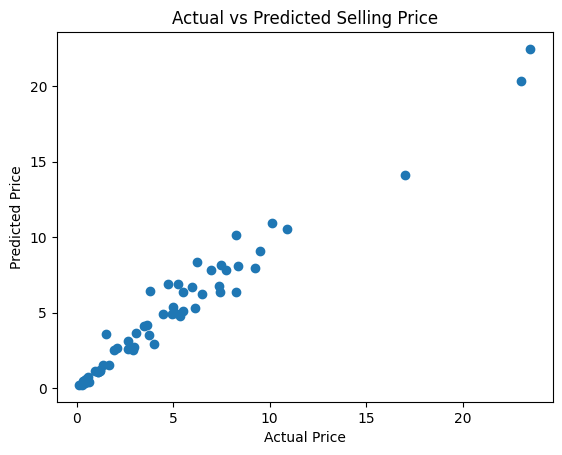

In [28]:
#Visualization
import matplotlib.pyplot as plt

plt.scatter(y_test, rf_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Selling Price")
plt.show()

In [29]:
#Predicting for custom values:

custom_car = pd.DataFrame({
    'Present_Price':[8.7],
    'Driven_kms':[34000],
    'Owner':[0],
    'Car_Age':[5],
    'Fuel_Type_Diesel':[0], #No
    'Fuel_Type_Petrol':[1], #Yes
    'Selling_type_Individual':[1],
    'Transmission_Manual':[1]
})

predicted_price = rf.predict(custom_car)
print("The Predicted Selling Price for the car (in lakhs) = ",predicted_price)

The Predicted Selling Price for the car (in lakhs) =  [6.872]


In [ ]:
#THANK YOU.....